In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
stats=pd.get_dummies(df['State'])

In [16]:
stats=stats.drop(['California'],axis=1)

In [18]:
df.drop(['State'],axis=1,inplace=True)

In [21]:
df=pd.concat([df,stats],axis=1)

In [22]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [41]:
number_col=df.select_dtypes(include='number')
number_col1=list(number_col)
print(number_col1)

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'Florida', 'New York']


In [33]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
Florida            0
New York           0
dtype: int64

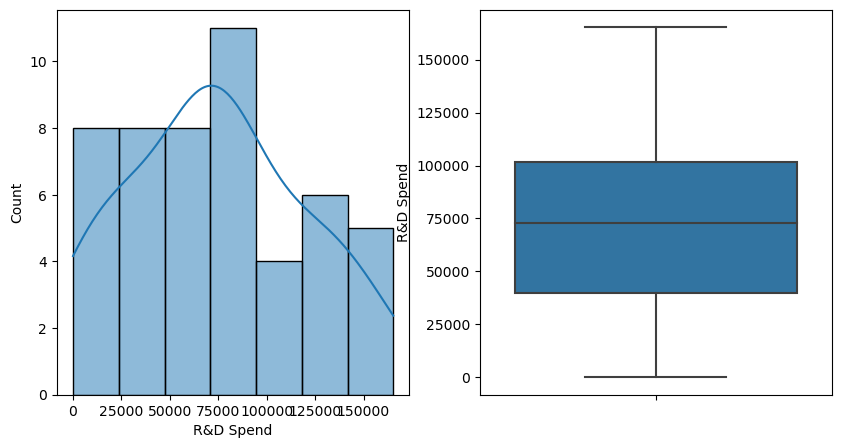

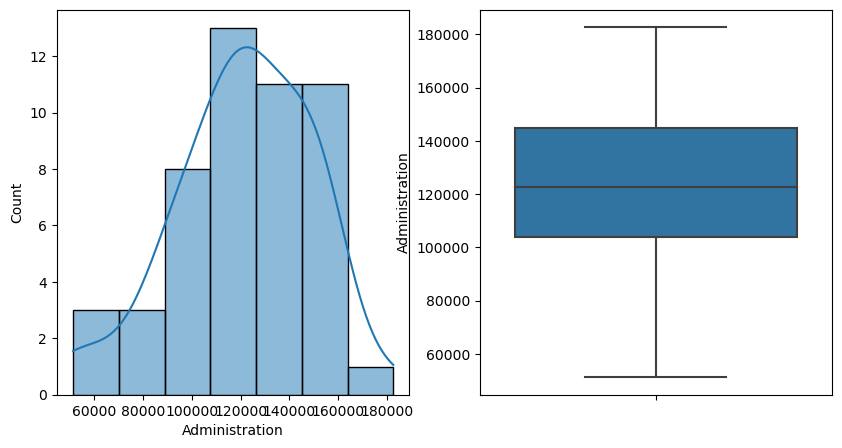

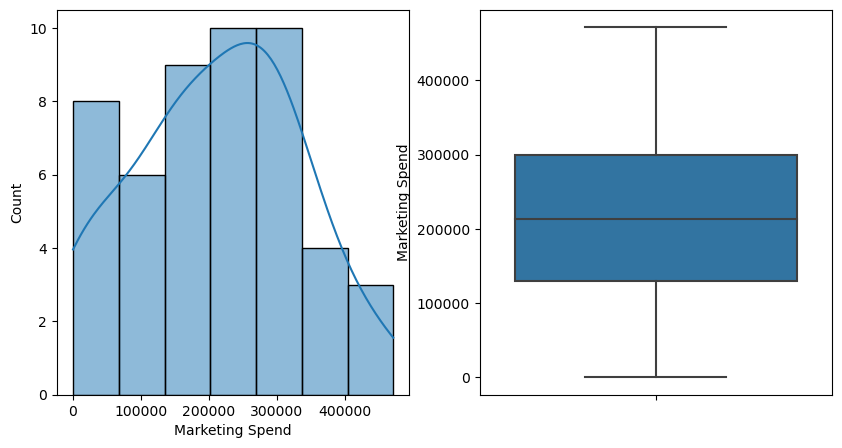

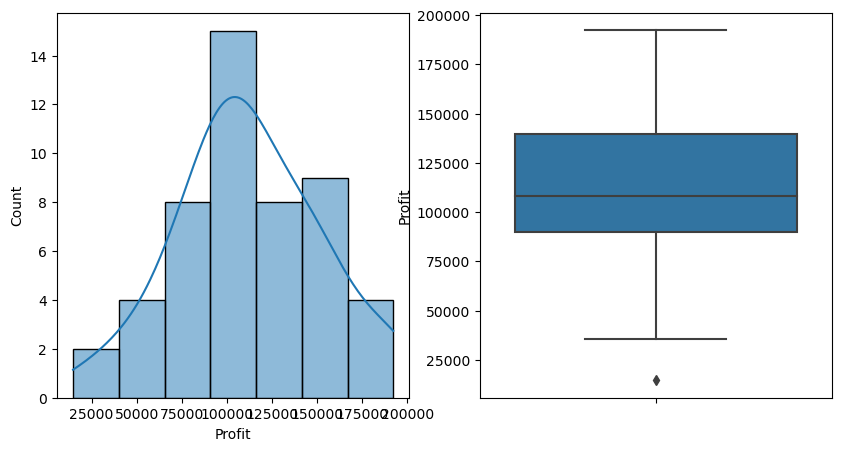

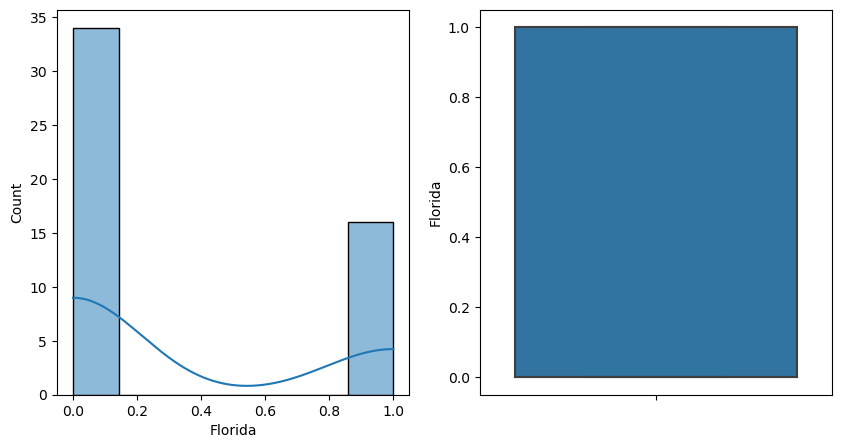

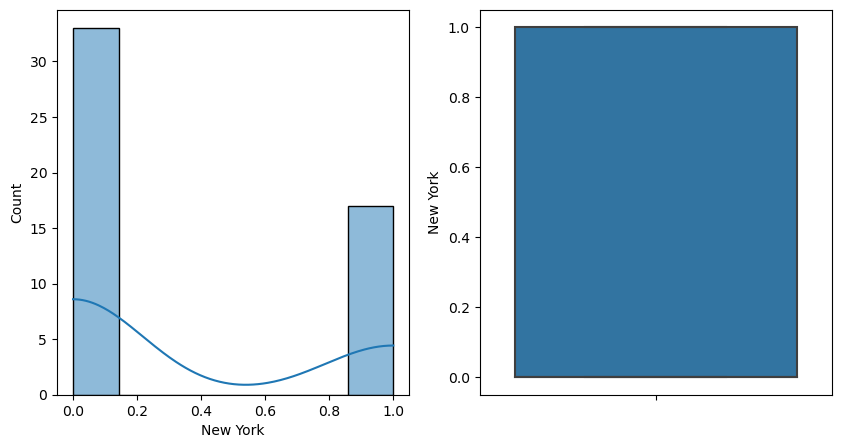

In [31]:
def num_dist(column,target='Profit'):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(x=column,kde=True,data=df)
    plt.subplot(1,2,2)
    sns.boxplot(y=column,data=df)

for col in df.columns:
    num_dist(col,df)
    


In [43]:
X=df.drop(['Profit'],axis=1)
Y=df['Profit']

In [63]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [64]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Test_Train Split

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(37, 5) (13, 5) (37,) (13,)


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,adjusted_rand_score,mean_squared_error

le=LinearRegression()

model=le.fit(x_train,y_train)

y_predict=model.predict(x_test)

print('R2 score:',r2_score(y_test,y_predict))

R2 score: 0.9190778286382402


### Observtions

- Simple Linear Regression Model prediction is good.